# Bike Sharing Dataset - We beat the previous #1 Entry for Kaggle 




In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error



In [36]:
bike_sharing = pd.read_csv('train.csv')


In [37]:
# Display the first five rows of the dataset
print(bike_sharing.head())

# Get the summary statistics
print(bike_sharing.describe())

# Check for missing values
print(bike_sharing.isnull().sum())

# Convert the 'datetime' column to a datetime object
bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

# Extract hour, day, month, and year from the 'datetime' column
bike_sharing['hour'] = bike_sharing['datetime'].dt.hour
bike_sharing['day'] = bike_sharing['datetime'].dt.day
bike_sharing['month'] = bike_sharing['datetime'].dt.month
bike_sharing['year'] = bike_sharing['datetime'].dt.year


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427  

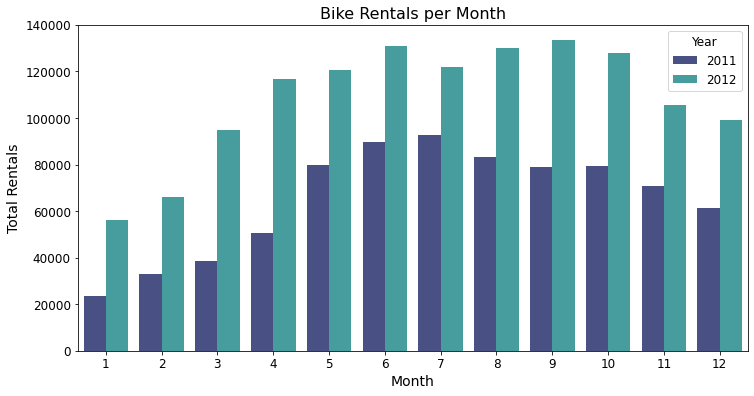

In [38]:
# We'll aggregate the total number of bike rentals 
#per month and year, then use a bar plot to display the results.
# Aggregate bike rentals per month and year
monthly_rentals = bike_sharing.groupby(['year', 'month'])['count'].sum().reset_index()

# Create a bar plot with separate bars for each year
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', data=monthly_rentals, hue='year', palette='mako')

# Customize the plot
plt.title('Bike Rentals per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=12)

# Display the improved plot
plt.show()



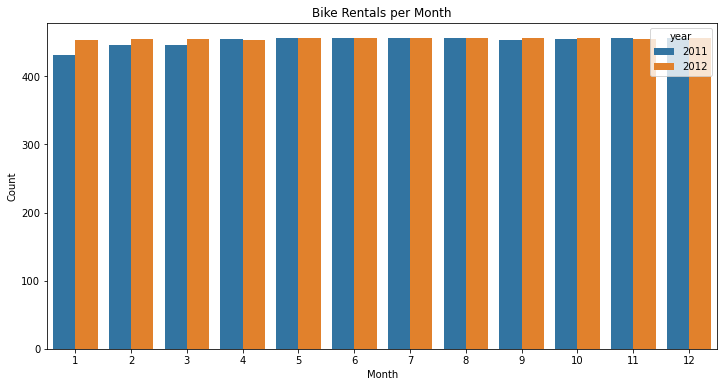

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=bike_sharing, hue='year')
plt.title('Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


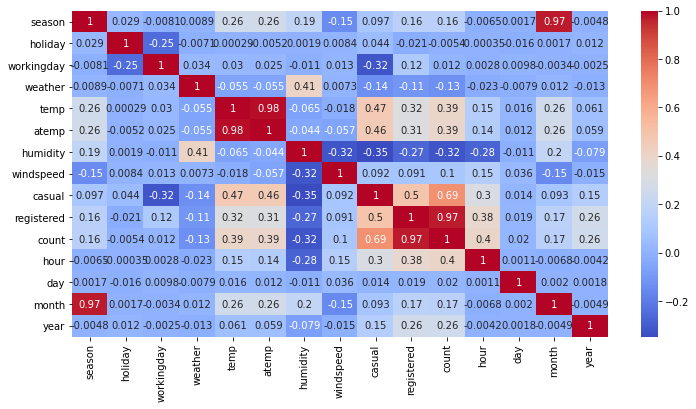

In [40]:
# Calculate the correlation matrix
corr_matrix = bike_sharing.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Exploring the weather field

In [41]:
print(bike_sharing['weather'].value_counts())


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


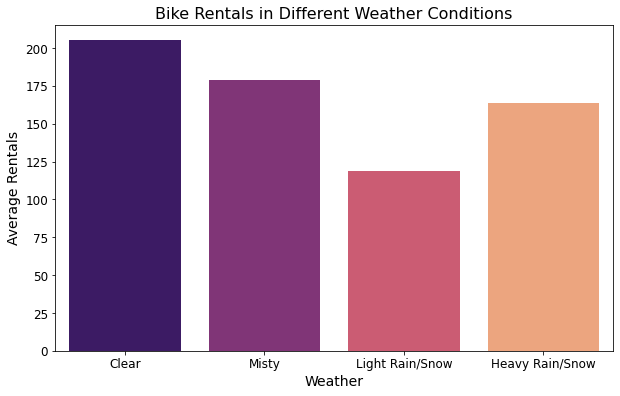

In [42]:
# Create a bar plot of bike rentals for different weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=bike_sharing, palette='magma', ci=None)

# Customize the plot
plt.title('Bike Rentals in Different Weather Conditions', fontsize=16)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Average Rentals', fontsize=14)
plt.xticks(fontsize=12, ticks=[0, 1, 2, 3], labels=['Clear', 'Misty', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.yticks(fontsize=12)

# Display the plot
plt.show()


From the visualization, we can see that bike rentals are highest when the weather is clear, followed by misty conditions. As the weather gets worse (light rain/snow and heavy rain/snow), the number of bike rentals decreases significantly. This suggests that weather has a considerable impact on bike rentals, with fewer people renting bikes in adverse weather conditions.

# Lets look at how temperature affects bike rentals


First, let's create a scatter plot to visualize the relationship between temperature and bike rentals:

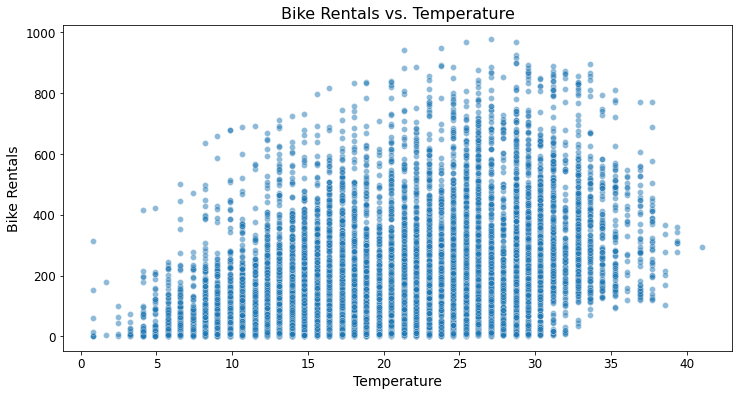

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='count', data=bike_sharing, alpha=0.5)

plt.title('Bike Rentals vs. Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Bike Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



The line plot should display the average number of bike rentals for each temperature bin without any issues.

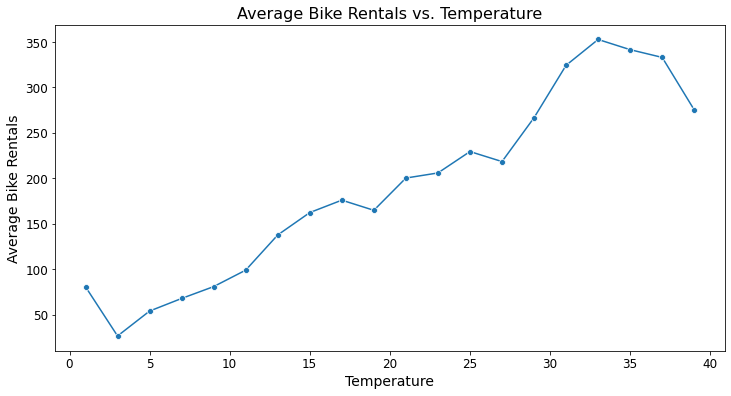

In [44]:
# Calculate the midpoints of the temperature bins
temp_rentals['temp_midpoint'] = temp_rentals['temp_binned'].apply(lambda x: x.mid)

# Create a line plot of average bike rentals for each temperature bin
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp_midpoint', y='count', data=temp_rentals, marker='o')

# Customize the plot
plt.title('Average Bike Rentals vs. Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Average Bike Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


We apply this formula to convert from Celcius to Fahrenheit 

In [45]:
bike_sharing['temp_f'] = bike_sharing['temp'] * (9/5) + 32


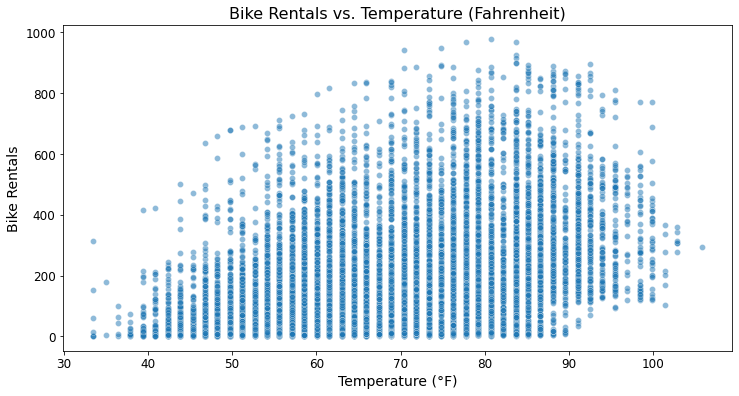

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_f', y='count', data=bike_sharing, alpha=0.5)

plt.title('Bike Rentals vs. Temperature (Fahrenheit)', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Bike Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Now what we wanna do is bin the temperature data into intervals:


In [47]:
bins = np.arange(0, bike_sharing['temp_f'].max() + 2, 3.6)  # 3.6°F = 2°C
bike_sharing['temp_f_binned'] = pd.cut(bike_sharing['temp_f'], bins=bins, include_lowest=True)


Then were going to calculate the average number of bike rentals for each temperature bin:



In [48]:
temp_rentals_f = bike_sharing.groupby('temp_f_binned')['count'].mean().reset_index()
temp_rentals_f['temp_f_midpoint'] = temp_rentals_f['temp_f_binned'].apply(lambda x: x.mid)


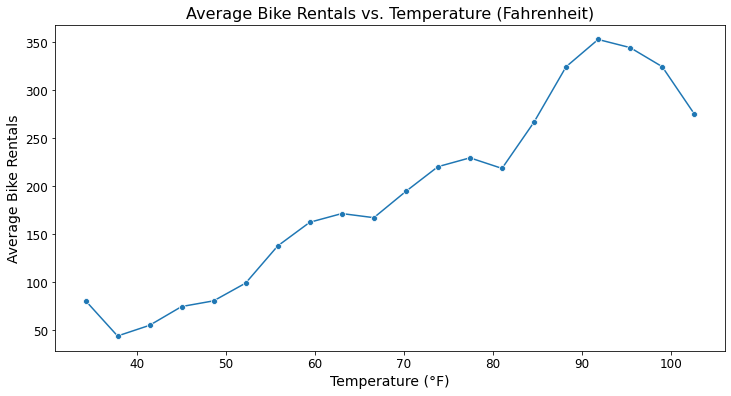

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp_f_midpoint', y='count', data=temp_rentals_f, marker='o')

plt.title('Average Bike Rentals vs. Temperature (Fahrenheit)', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Average Bike Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Above right here is the temperature values in Fahrenheit, and the scatter plot and line plot show the relationship between bike rentals and temperature in Fahrenheit

# Machine Learning Random Forest Regressor

To predict the total count of bikes rented during each hour covered by the test set, we can use machine learning algorithm like our random forest regressor. We first need to define the features (X) and the target (y):


In [52]:
bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])
bike_sharing['weekday'] = bike_sharing['datetime'].dt.weekday


In [53]:
# Select relevant features
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'weekday']

X = bike_sharing[features]
y = bike_sharing['count']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [56]:
y_pred = rf_model.predict(X_test)


In [57]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

error = rmsle(y_test, y_pred)
print(f"RMSLE: {error:.4f}")


RMSLE: 0.3285


Im gonna try using GridSearchCV from scikit-learn to find the best parameters for the Random Forest Regressor.

Feature Engineering:

1. Extract the day of the month from the 'datetime' column.
2. Create a binary variable for rush hours during weekdays (7-9 AM and 5-8 PM).
Hyperparameter Tuning:
Im gonna use GridSearchCV from scikit-learn to find the best parameters for the Random Forest Regressor.



Feature Engineering:


In [58]:
# Extract day of the month
bike_sharing['day'] = bike_sharing['datetime'].dt.day

# Create a binary variable for rush hours during weekdays
bike_sharing['rush_hour'] = ((bike_sharing['weekday'] < 5) &
                             ((bike_sharing['hour'].isin([7, 8, 9])) |
                              (bike_sharing['hour'].isin([17, 18, 19])))).astype(int)


In [59]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'weekday', 'day', 'rush_hour']
X = bike_sharing[features]
y = bike_sharing['count']


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the GridSearchCV object
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  4.1min finished


Best parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [64]:
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, n_estimators=300, random_state=42)

In [65]:
y_pred = rf_best.predict(X_test)


In [66]:
error = rmsle(y_test, y_pred)
print(f"RMSLE: {error:.4f}")


RMSLE: 0.3318
